In [1]:
#import george
#from george import kernels

ModuleNotFoundError: No module named 'george'

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from scipy.stats import multivariate_normal

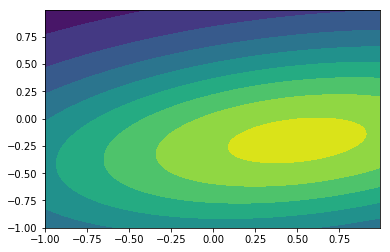

In [4]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contourf(x, y, rv.pdf(pos))

In [5]:
mgrid = np.lib.index_tricks.nd_grid()
x,y,t = mgrid[-1:1:.3, -1:1:.3, 0:1:.05]

In [6]:
x.size, y.size, t.size

(980, 980, 980)

In [7]:
#Covariance is going to be:
980**2

960400

3 birds in 1-d

In [8]:
n_t = 100
n_birds = 70
t = np.linspace(0,1,n_t)

In [9]:
cov = np.zeros((n_birds*n_t)**2).reshape((n_birds*n_t,n_birds*n_t))
cov_x = np.zeros((n_birds*n_t)**2).reshape((n_birds*n_t,n_birds*n_t))
cov_y = np.zeros((n_birds*n_t)**2).reshape((n_birds*n_t,n_birds*n_t))
cov_z = np.zeros((n_birds*n_t)**2).reshape((n_birds*n_t,n_birds*n_t))

In [10]:
# mean location for birds
#mu_birds = np.array([0.,.1, 1.])
##mu_birds = np.random.uniform(0.,.1,n_birds)
mu_birds = np.linspace(0.,1, n_birds)
#mu_birds_x = np.random.normal(0.,.21, n_birds)
#mu_birds_y = np.random.normal(0.,.21, n_birds)
#mu_birds_z = np.random.normal(0.,.21, n_birds)

mu_birds_x = np.random.uniform(0.,1, n_birds)
mu_birds_y = np.random.uniform(0.,1, n_birds)
mu_birds_z = np.random.uniform(0.,1, n_birds)


mean = np.zeros(n_birds*n_t)
mean_x = np.zeros(n_birds*n_t)
mean_y = np.zeros(n_birds*n_t)
mean_z = np.zeros(n_birds*n_t)

for i in range(n_birds):
    mean[i*n_t:(i+1)*n_t] = mu_birds[i]*np.ones(n_t)
    mean_x[i*n_t:(i+1)*n_t] = mu_birds_x[i]*np.ones(n_t)
    mean_y[i*n_t:(i+1)*n_t] = mu_birds_y[i]*np.ones(n_t)
    mean_z[i*n_t:(i+1)*n_t] = mu_birds_z[i]*np.ones(n_t)

In [11]:
L_t = .1 #length scale for time
A_flock = 1 # Amp for flock 
L_x = .3 #length scale for x-location
A_bird = 0.1

L_com = .8
A_com = .5

A_frame = np.sqrt(A_com**2 + A_flock**2 + A_bird**2)

In [12]:
t1, t2 = np.meshgrid(t,t)
mini_cov = (A_flock**2)*np.exp(-(t1-t2)**2/L_t/L_t).reshape((n_t, n_t))

In [13]:
com_cov = (A_com**2)*np.exp(-(t1-t2)**2/L_com/L_com).reshape((n_t, n_t))

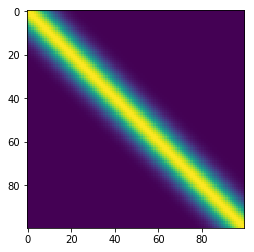

In [14]:
plt.imshow(mini_cov)

In [15]:
for i in range(n_birds):
    for j in range(n_birds):
        cov[i*n_t:(i+1)*n_t, j*n_t:(j+1)*n_t] = (A_bird**2)*np.exp(-(mu_birds[i]-mu_birds[j])**2/L_x/L_x)*mini_cov
        cov_x[i*n_t:(i+1)*n_t, j*n_t:(j+1)*n_t] = (A_bird**2)*np.exp(-(mu_birds_x[i]-mu_birds_x[j])**2/L_x/L_x)*mini_cov
        cov_y[i*n_t:(i+1)*n_t, j*n_t:(j+1)*n_t] = (A_bird**2)*np.exp(-(mu_birds_y[i]-mu_birds_y[j])**2/L_x/L_x)*mini_cov
        cov_z[i*n_t:(i+1)*n_t, j*n_t:(j+1)*n_t] = (A_bird**2)*np.exp(-(mu_birds_z[i]-mu_birds_z[j])**2/L_x/L_x)*mini_cov        

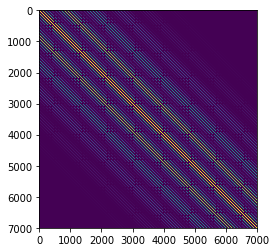

In [16]:
plt.imshow(cov)

In [17]:
from scipy.stats import multivariate_normal

In [18]:
x_of_t = multivariate_normal.rvs(mean_x, cov_x)
y_of_t = multivariate_normal.rvs(mean_y, cov_y)
z_of_t = multivariate_normal.rvs(mean_z, cov_z)

In [19]:
com_x_of_t = multivariate_normal.rvs(0*t, com_cov)
com_y_of_t = multivariate_normal.rvs(0*t, com_cov)
com_z_of_t = multivariate_normal.rvs(0*t, com_cov)

In [20]:
x_of_t += np.tile(com_x_of_t,n_birds)
y_of_t += np.tile(com_y_of_t,n_birds)
z_of_t += np.tile(com_z_of_t,n_birds)

In [21]:
colors = plt.cm.jet(np.linspace(0, 1, n_birds))

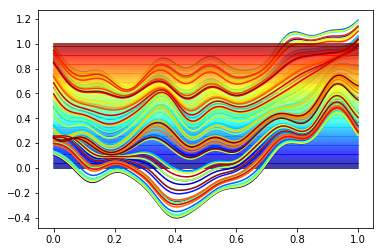

In [22]:
for i in range(n_birds):
    plt.plot(t,mean[i*n_t:(i+1)*n_t], c=colors[i])
    plt.plot(t,x_of_t[i*n_t:(i+1)*n_t], c=colors[i])

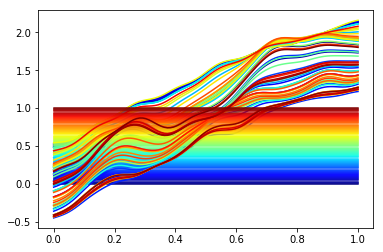

In [23]:
for i in range(n_birds):
    plt.plot(t,mean[i*n_t:(i+1)*n_t], c=colors[i])
    plt.plot(t,y_of_t[i*n_t:(i+1)*n_t], c=colors[i])

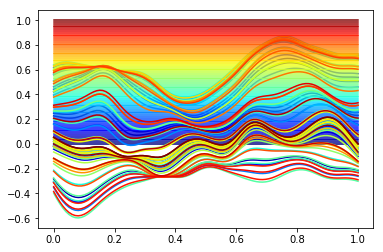

In [24]:
for i in range(n_birds):
    plt.plot(t,mean[i*n_t:(i+1)*n_t], c=colors[i])
    plt.plot(t,z_of_t[i*n_t:(i+1)*n_t], c=colors[i])

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

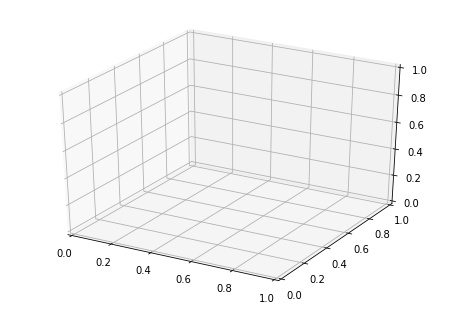

In [28]:
# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')

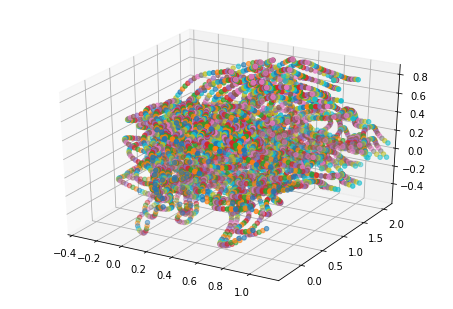

In [29]:
# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
#ax.axis('off')

for t in range(n_t):
    ax.scatter(x_of_t.reshape((n_birds,n_t))[:,t], y_of_t.reshape((n_birds,n_t))[:,t], z_of_t.reshape((n_birds,n_t))[:,t])


# prepare the axes limits
ax.set_xlim((np.min(x_of_t), np.max(x_of_t)))
ax.set_ylim((np.min(y_of_t), np.max(y_of_t)))
ax.set_zlim((np.min(z_of_t), np.max(z_of_t)))

plt.show()

# set point-of-view: specified by (altitude degrees, azimuth degrees)
#ax.view_init(30, 0)



In [30]:
# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(t):
    print('hello', t)
    ax.clear()
    ax.axis('off')


    # we'll step two time-steps per frame.  This leads to nice results.
    ax.scatter(x_of_t.reshape((n_birds,n_t))[:,t], y_of_t.reshape((n_birds,n_t))[:,t], z_of_t.reshape((n_birds,n_t))[:,t], c='black')


    #ax.view_init(30, 0.3 * i)
    ax.set_xlim((np.min(x_of_t), np.max(x_of_t)))
    ax.set_ylim((np.min(y_of_t), np.max(y_of_t)))
    ax.set_zlim((np.min(z_of_t), np.max(z_of_t)))

    fig.canvas.draw()
    return lines + pts



MovieWriter ffmpeg unavailable.


hello 0
hello 1
hello 2
hello 3
hello 4
hello 5
hello 6
hello 7
hello 8
hello 9
hello 10
hello 11
hello 12
hello 13
hello 14
hello 15
hello 16
hello 17
hello 18
hello 19
hello 20
hello 21
hello 22
hello 23
hello 24
hello 25
hello 26
hello 27
hello 28
hello 29
hello 30
hello 31
hello 32
hello 33
hello 34
hello 35
hello 36
hello 37
hello 38
hello 39
hello 40
hello 41
hello 42
hello 43
hello 44
hello 45
hello 46
hello 47
hello 48
hello 49
hello 50
hello 51
hello 52
hello 53
hello 54
hello 55
hello 56
hello 57
hello 58
hello 59
hello 60
hello 61
hello 62
hello 63
hello 64
hello 65
hello 66
hello 67
hello 68
hello 69
hello 70
hello 71
hello 72
hello 73
hello 74
hello 75
hello 76
hello 77
hello 78
hello 79
hello 80
hello 81
hello 82
hello 83
hello 84
hello 85
hello 86
hello 87
hello 88
hello 89
hello 90
hello 91
hello 92
hello 93
hello 94
hello 95
hello 96
hello 97
hello 98
hello 99


ValueError: unknown file extension: .mp4

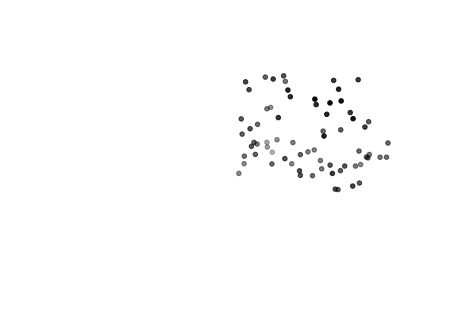

In [31]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_t, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('murmuration.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()

In [ ]:
A_frame*1.5/2